In [1]:
import pandas as pd
import numpy as np

import igraph as ig
import networkx as nx

import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
nodeList = pd.read_csv('tvshow_edges.csv')

In [3]:
GT = nx.from_pandas_edgelist(df=nodeList, source="node_1", target="node_2")

In [4]:
nx.write_gml(GT, "twitter.gml")

In [5]:
G1 = ig.Graph.Read_GML("twitter.gml")

In [6]:
print("The graph has", G1.vcount(), "nodes and", G1.ecount(), "edges")

The graph has 3892 nodes and 17262 edges


In [7]:
visual_style = {
    "vertex_size": 10,
    "vertex_color": ["red"] * G1.vcount(),
    "edge_color": "black",
    "bbox": (800, 800),
    "margin": 50,
    "vertex_label": None
}

layout = G1.layout("kk")
#ig.plot(G1, layout=layout, **visual_style)

##### Degree Distribution

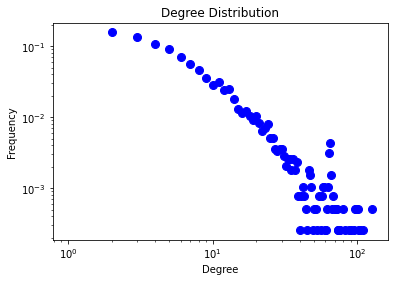

In [8]:
degrees = G1.degree()

degree_dist = np.histogram(degrees, bins=range(np.max(degrees)+2), density=True)[0]

plt.loglog(range(1, len(degree_dist)+1), degree_dist, 'bo', markersize=8)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

##### Infomap

In [9]:
infomap = G1.community_infomap(trials= 100)

In [10]:
visual_style = {
    "vertex_size": 8,
    "vertex_color": infomap.membership,
    "edge_color": "gray",
    "bbox": (800, 800),
    "margin": 50,
    "vertex_label": None
}

layout = G1.layout("fr")
#ig.plot(infomap, layout=layout, **visual_style)

In [11]:
infomapC = len(set(infomap.membership))
print("Number of communities found:", infomapC)

Number of communities found: 288


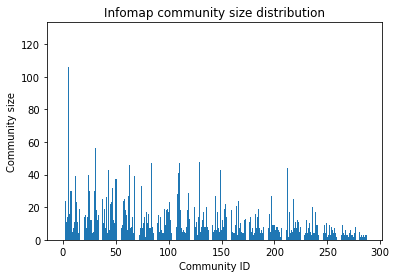

In [12]:
infomapSizes = infomap.sizes()

# Create a bar plot of the community size distribution
fig, ax = plt.subplots()
ax.bar(range(len(infomapSizes)), infomapSizes)
ax.set_xlabel('Community ID')
ax.set_ylabel('Community size')
ax.set_title('Infomap community size distribution')

# Show the plot
plt.show()

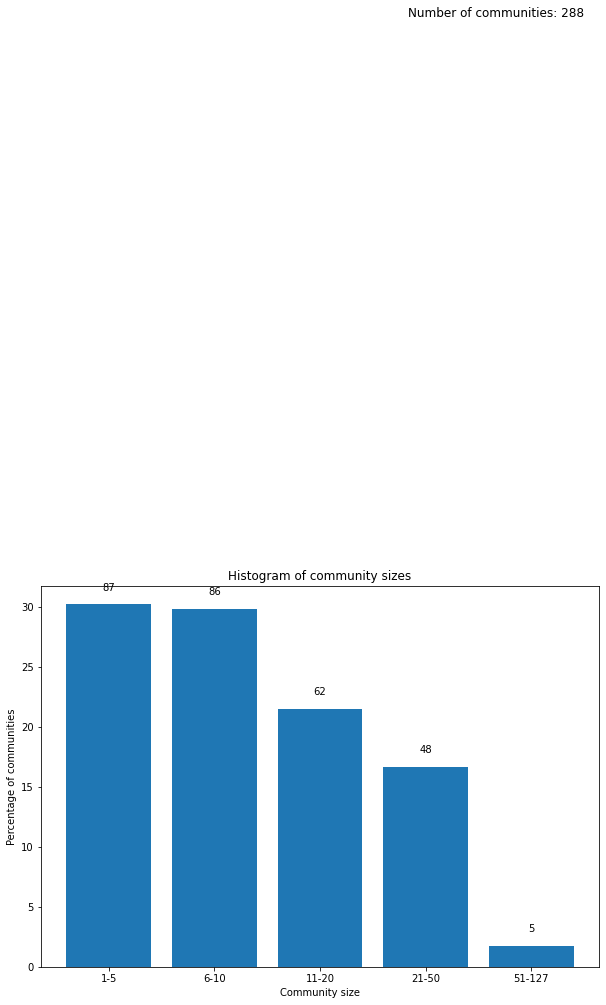

In [13]:
ranges = [(1, 5), (6, 10), (11, 20), (21, 50), (51, max(infomapSizes))]

counts = []
percentages = [] 

for r in ranges:
    count = sum(1 for s in infomapSizes if r[0] <= s <= r[1])
    percentage = count / len(infomapSizes) * 100
    percentages.append(percentage)
    counts.append(count)
    
plt.figure(figsize=(10,7))
plt.bar(range(len(ranges)), percentages)
plt.xticks(range(len(ranges)), [f'{r[0]}-{r[1]}' for r in ranges])
plt.xlabel('Community size')
plt.ylabel('Percentage of communities')
plt.title('Histogram of community sizes')

num_communities = len(infomapSizes)
plt.text(4.5, 80, f'Number of communities: {num_communities}', fontsize=12, ha='right', va='top')

for i, r in enumerate(ranges):
    plt.text(i, percentages[i] + 1, f'{counts[i]}', fontsize=10, ha='center', va='bottom')

plt.show()

##### Multivevel

In [14]:
multilevel = G1.community_multilevel()

In [15]:
visual_style = {
    "vertex_size": 5,
    "vertex_color": multilevel.membership,
    "edge_color": "gray",
    "bbox": (800, 800),
    "margin": 50,
    "vertex_label": None
}

layout = G1.layout("fr")
#ig.plot(multilevel, layout=layout, **visual_style)

In [16]:
multilevelC = len(set(multilevel.membership))
print("Number of communities found:", multilevelC)

Number of communities found: 49


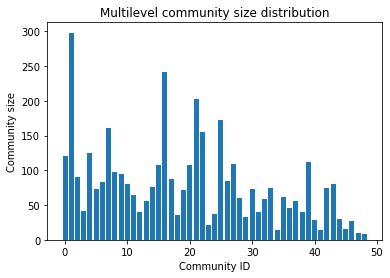

In [17]:
multilevelSizes = multilevel.sizes()

fig, ax = plt.subplots()
ax.bar(range(len(multilevelSizes)), multilevelSizes)
ax.set_xlabel('Community ID')
ax.set_ylabel('Community size')
ax.set_title('Multilevel community size distribution')

# Show the plot
plt.show()

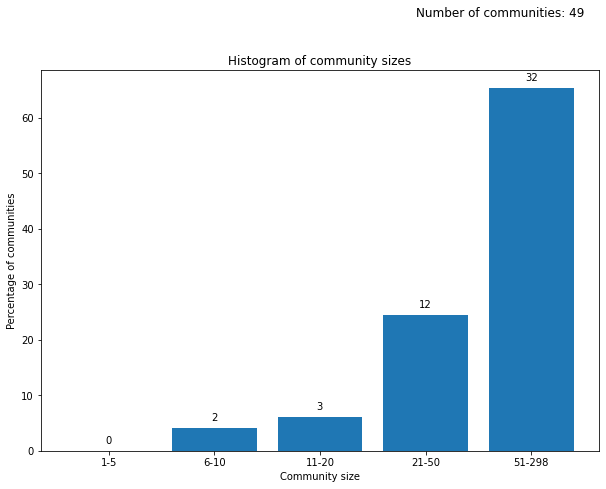

In [18]:
ranges = [(1, 5), (6, 10), (11, 20), (21, 50), (51, max(multilevelSizes))]

counts = []
percentages = []

for r in ranges:
    count = sum(1 for s in multilevelSizes if r[0] <= s <= r[1])
    percentage = count / len(multilevelSizes) * 100
    percentages.append(percentage)
    counts.append(count)

plt.figure(figsize=(10,7))
plt.bar(range(len(ranges)), percentages)
plt.xticks(range(len(ranges)), [f'{r[0]}-{r[1]}' for r in ranges])
plt.xlabel('Community size')
plt.ylabel('Percentage of communities')
plt.title('Histogram of community sizes')

num_communities = len(multilevelSizes)
plt.text(4.5, 80, f'Number of communities: {num_communities}', fontsize=12, ha='right', va='top')

for i, r in enumerate(ranges):
    plt.text(i, percentages[i] + 1, f'{counts[i]}', fontsize=10, ha='center', va='bottom')

plt.show()

##### Label Propagation

In [19]:
 labelpropagation = G1.community_label_propagation()

In [20]:
visual_style = {
    "vertex_size": 8,
    "vertex_color": labelpropagation.membership,
    "edge_color": "gray",
    "bbox": (800, 800),
    "margin": 50,
    "vertex_label": None
}

layout = G1.layout("kk")
#ig.plot(labelpropagation, layout=layout, **visual_style)

In [21]:
labelpropagationC = len(set(labelpropagation.membership))
print("Number of communities found:", labelpropagationC)

Number of communities found: 242


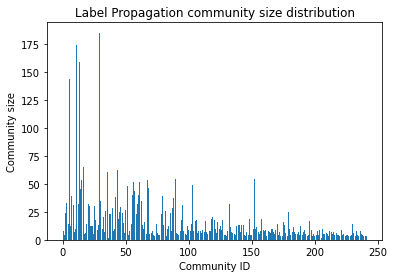

In [22]:
labelpropagationSizes = labelpropagation.sizes()

fig, ax = plt.subplots()
ax.bar(range(len(labelpropagationSizes)), labelpropagationSizes)
ax.set_xlabel('Community ID')
ax.set_ylabel('Community size')
ax.set_title('Label Propagation community size distribution')

plt.show()

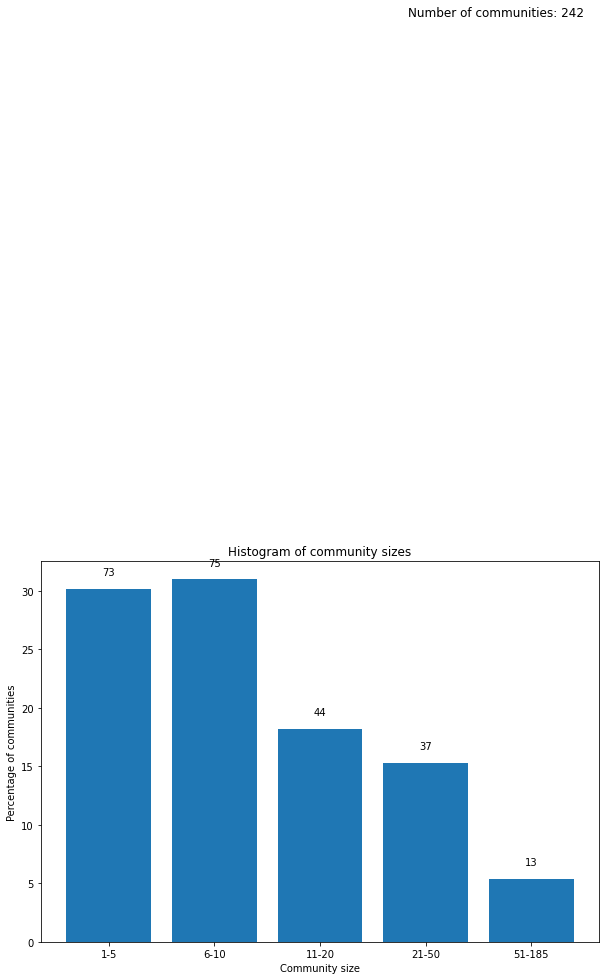

In [23]:
ranges = [(1, 5), (6, 10), (11, 20), (21, 50), (51, max(labelpropagationSizes))]

counts = []
percentages = []

for r in ranges:
    count = sum(1 for s in labelpropagationSizes if r[0] <= s <= r[1])
    percentage = count / len(labelpropagationSizes) * 100
    percentages.append(percentage)
    counts.append(count)
    
plt.figure(figsize=(10,7))
plt.bar(range(len(ranges)), percentages)
plt.xticks(range(len(ranges)), [f'{r[0]}-{r[1]}' for r in ranges])
plt.xlabel('Community size')
plt.ylabel('Percentage of communities')
plt.title('Histogram of community sizes')

num_communities = len(labelpropagationSizes)
plt.text(4.5, 80, f'Number of communities: {num_communities}', fontsize=12, ha='right', va='top')

for i, r in enumerate(ranges):
    plt.text(i, percentages[i] + 1, f'{counts[i]}', fontsize=10, ha='center', va='bottom')

plt.show()

##### Fastgreedy

In [24]:
fastgreedy = G1.community_fastgreedy()

In [25]:
visual_style = {
    "vertex_size": 8,
    "vertex_color": fastgreedy.as_clustering().membership,
    "edge_color": "gray",
    "bbox": (800, 800),
    "margin": 50,
    "vertex_label": None
}

layout = G1.layout("fr")
#ig.plot(fastgreedy, layout=layout, **visual_style)

In [26]:
fastgreedyC = fastgreedy.as_clustering()
fgCommunities = len(fastgreedyC)
print("Number of communities found:", fgCommunities)

Number of communities found: 53


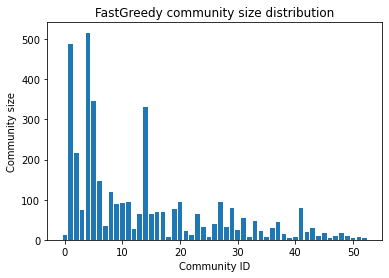

In [27]:
fg_clusters = fastgreedy.as_clustering()
fgSizes = fg_clusters.sizes()

fig, ax = plt.subplots()
ax.bar(range(len(fgSizes)), fgSizes)
ax.set_xlabel('Community ID')
ax.set_ylabel('Community size')
ax.set_title('FastGreedy community size distribution')

plt.show()

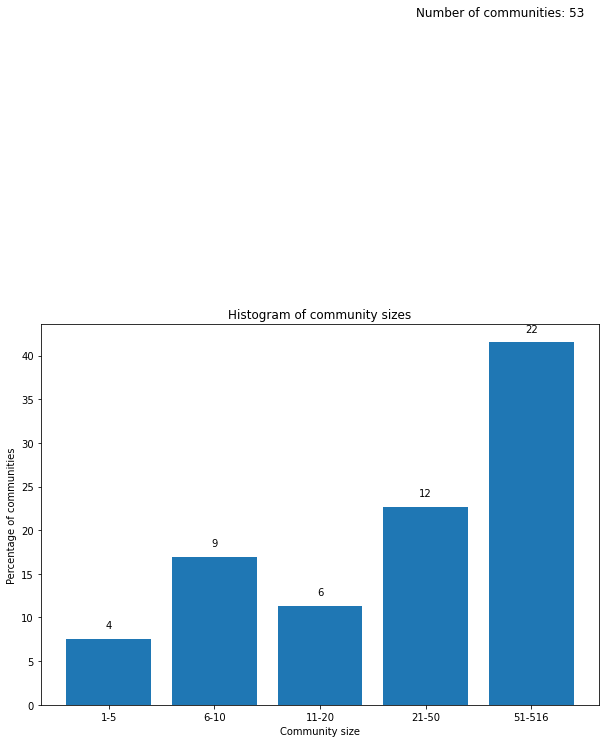

In [28]:
ranges = [(1, 5), (6, 10), (11, 20), (21, 50), (51, max(fgSizes))]

counts = []

percentages = []
for r in ranges:
    count = sum(1 for s in fgSizes if r[0] <= s <= r[1])
    percentage = count / len(fgSizes) * 100
    percentages.append(percentage)
    counts.append(count)

plt.figure(figsize=(10,7))
plt.bar(range(len(ranges)), percentages)
plt.xticks(range(len(ranges)), [f'{r[0]}-{r[1]}' for r in ranges])
plt.xlabel('Community size')
plt.ylabel('Percentage of communities')
plt.title('Histogram of community sizes')

num_communities = len(fgSizes)
plt.text(4.5, 80, f'Number of communities: {num_communities}', fontsize=12, ha='right', va='top')

for i, r in enumerate(ranges):
    plt.text(i, percentages[i] + 1, f'{counts[i]}', fontsize=10, ha='center', va='bottom')

plt.show()

##### Walktrap

In [29]:
walktrap = G1.community_walktrap()

In [30]:
visual_style = {
    "vertex_size": 8,
    "vertex_color": walktrap.as_clustering().membership,
    "edge_color": "gray",
    "bbox": (800, 800),
    "margin": 50,
    "vertex_label": None
}

layout = G1.layout("fr")
#ig.plot(walktrap, layout=layout, **visual_style)

In [31]:
walktrapC = walktrap.as_clustering()
wtCommunities = len(walktrapC)
print("Number of communities found:", wtCommunities)

Number of communities found: 446


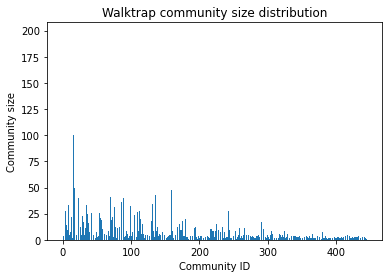

In [32]:
wt_clusters = walktrap.as_clustering()
wtSizes = wt_clusters.sizes()

fig, ax = plt.subplots()
ax.bar(range(len(wtSizes)), wtSizes)
ax.set_xlabel('Community ID')
ax.set_ylabel('Community size')
ax.set_title('Walktrap community size distribution')

plt.show()

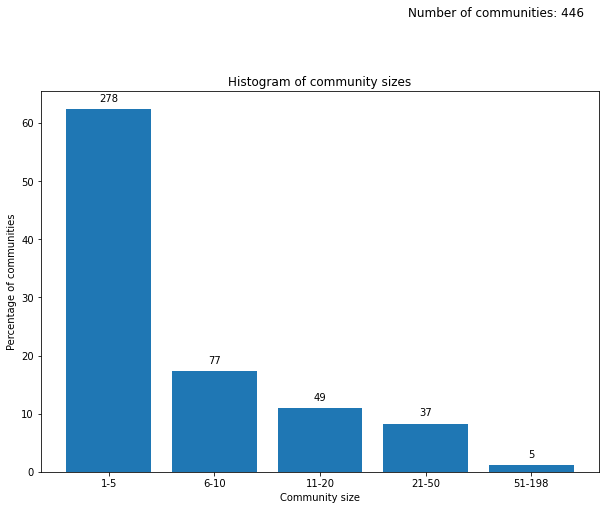

In [33]:
ranges = [(1, 5), (6, 10), (11, 20), (21, 50), (51, max(wtSizes))]

counts = []
percentages = []

for r in ranges:
    count = sum(1 for s in wtSizes if r[0] <= s <= r[1])
    percentage = count / len(wtSizes) * 100
    percentages.append(percentage)
    counts.append(count)
    
plt.figure(figsize=(10,7))
plt.bar(range(len(ranges)), percentages)
plt.xticks(range(len(ranges)), [f'{r[0]}-{r[1]}' for r in ranges])
plt.xlabel('Community size')
plt.ylabel('Percentage of communities')
plt.title('Histogram of community sizes')

num_communities = len(wtSizes)
plt.text(4.5, 80, f'Number of communities: {num_communities}', fontsize=12, ha='right', va='top')

for i, r in enumerate(ranges):
    plt.text(i, percentages[i] + 1, f'{counts[i]}', fontsize=10, ha='center', va='bottom')

plt.show()

##### Community size

In [34]:
models = ['Infomap', 'Multilevel', 'Label_Propagation', 'Fast_Greedy', 'Walktrap']
communities = {}

communities['Infomap'] = infomapC
communities['Multilevel'] = multilevelC
communities['Label_Propagation'] = labelpropagationC
communities['Fast_Greedy'] = fgCommunities
communities['Walktrap'] = wtCommunities

metrics = {'Algorithm': None, 'No. of Communities': None, 'Dataset': None}

In [35]:
all_metrics = []

for model in models:
    metrics['Algorithm'] = model
    metrics['No. of Communities'] = communities.get(model)
    metrics['Dataset'] = 'Twitter'
    all_metrics.append(metrics.copy())

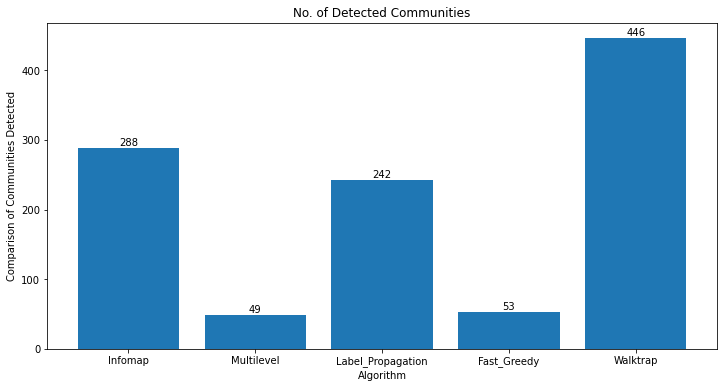

In [36]:
x_values = [d['Algorithm'] for d in all_metrics]
y_values = [d['No. of Communities'] for d in all_metrics]

plt.figure(figsize=(12, 6))
plt.bar(x_values, y_values)

plt.xlabel('Algorithm')
plt.ylabel('Comparison of Communities Detected')
plt.title('No. of Detected Communities')

for i in range(len(x_values)):
    plt.text(x=i, y=y_values[i]+1, s=y_values[i], ha='center', va='bottom')
    
plt.show()

##### Modularity 
High modularity scores mean more distince clusters

In [37]:
algos = [('Infomap', infomap.modularity),
         ('Multilevel', multilevel.modularity),
         ('Label propagation', labelpropagation.modularity),
         ('Fast Greedy', fastgreedy.as_clustering().modularity),
         ('Walktrap', walktrap.as_clustering().modularity),]


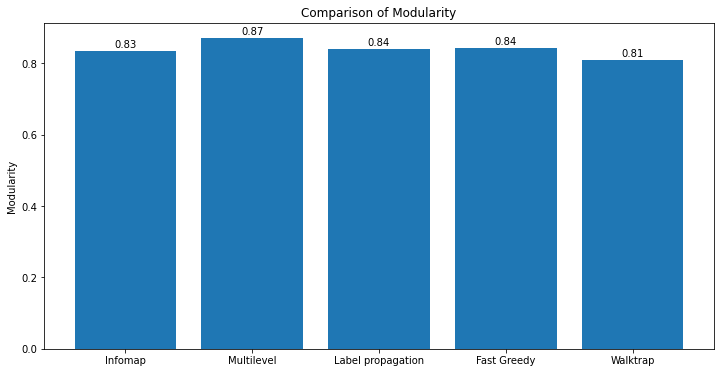

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar([algo[0] for algo in algos], [algo[1] for algo in algos])
ax.set_ylabel('Modularity')
plt.title('Comparison of Modularity')

for i, v in enumerate(algos):
    ax.text(i, v[1] + 0.01, str(round(v[1], 2)), ha='center', fontsize=10)
    
plt.show()

##### Coverage

In [39]:
algorithms = ['Infomap', 'Multilevel', 'Label Propagation', 'Fast Greedy', 'Walktrap']
coverage = []

for alg in algorithms:
    if alg == 'Infomap':
        c = infomap
    elif alg == 'Multilevel':
        c = multilevel
    elif alg == 'Label Propagation':
        c = labelpropagation
    elif alg == 'Fast Greedy':
        c = fastgreedy.as_clustering()
    elif alg == 'Walktrap':
        c = walktrap.as_clustering()
    cov = np.mean([len(set(G1.vs[i]['label'] for i in c[j])) / G1.vcount() for j in range(len(c))])
    coverage.append(cov)

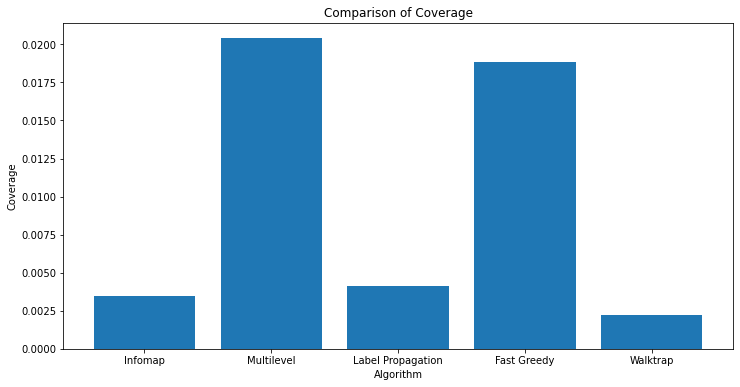

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))
rects = ax.bar(algorithms, coverage)
plt.xlabel('Algorithm')
plt.ylabel('Coverage')
plt.title('Comparison of Coverage')    
plt.show()

##### Execution time

In [41]:
import time

algos = [('Infomap', ig.Graph.community_infomap),
         ('Multilevel', ig.Graph.community_multilevel),
         ('Label propagation', ig.Graph.community_label_propagation),
         ('Fastgreedy', ig.Graph.community_fastgreedy),
         ('Walktrap', ig.Graph.community_walktrap)]

algors = ['infomap', 'multilevel', 'label_propagation', 'fastgreedy', 'walktrap']

times = []
for algo in algors:
    start = datetime.now()
    clusters = getattr(G1, 'community_' + algo)()
    finish = datetime.now()
    time_elapsed = (finish - start).total_seconds()
    times.append(time_elapsed)

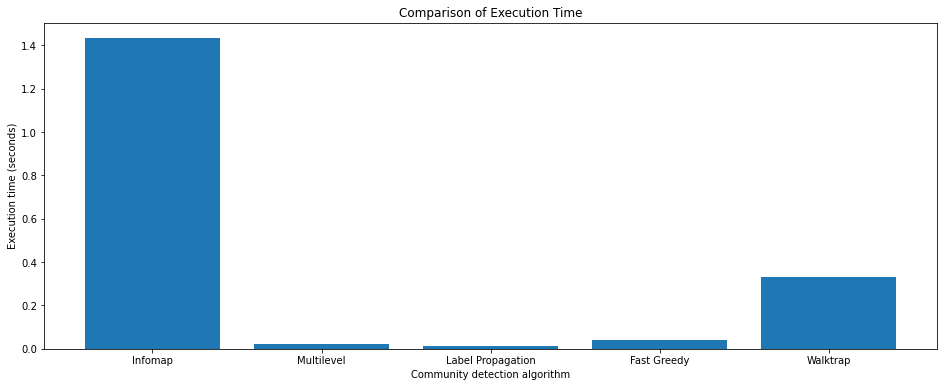

In [42]:

# Plot execution times
fig = plt.subplots(figsize=(16, 6))
plt.bar(algorithms, times)
plt.xlabel('Community detection algorithm')
plt.ylabel('Execution time (seconds)')
plt.title('Comparison of Execution Time')
plt.show()